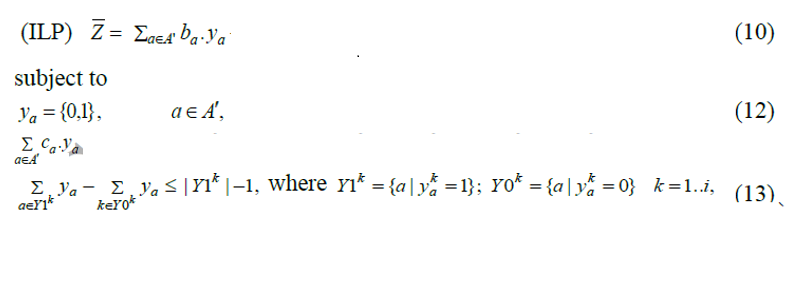

In [4]:
import numpy as np
from pyomo.environ import *
from pyomo import opt



def fobjective(LIP):
    return (summation(LIP.b, LIP.y)) 
    #return (summation(LIP.b, LIP.y) + (LIP.B_bar * summation(LIP.c, LIP.y))) 

def consBudjet(LIP): 
    return summation(LIP.c, LIP.y) <= LIP.B




In [5]:
def sdLIPSolve(B,c,b,Y,Solvername='cplex'):
    LIP = AbstractModel()
    LIP.A = range(len(c))
    LIP.y = Var(LIP.A,within=Binary)
    LIP.b = Param(LIP.A, initialize= dict(enumerate(b.flatten(), 0))) # داده باید از نوع دیکشنری شود 
    LIP.c = Param(LIP.A,initialize= dict(enumerate(c.flatten(), 0)))
    LIP.B = Param(initialize=B, domain=Reals) #Bodjet

    #LIP.B_bar = Param(initialize=B_bar, domain=Reals)

    LIP.obj = Objective(rule=fobjective,sense=minimize)
    LIP.consBudjet = Constraint(rule=consBudjet)   

    LIP.cuts = ConstraintList()

    opt = SolverFactory(Solvername)
    instance = LIP.create_instance()

    instance.cuts.clear()
    for i in range(len(Y)):
        exp1= 0
        exp2 = 0
        for j in instance.A:
          if Y[i][j] == 1:
            exp1 += instance.y[j]
          else:
            exp2 += instance.y[j]
        instance.cuts.add(exp1-exp2 <= sum(Y[i][k] for k in instance.A) -1 )
    instance.cuts.pprint()
    results = opt.solve(instance)
    #instance.display()

    tmp = np.zeros(len(instance.y))
    for r in range(len(instance.y)):
        tmp[r] =instance.y[r].value

    return [tmp]


In [1]:
#!pip install cplex